**IR PROJECT: WHAT'S COOKING ?**
- By Sufiyan Ur Rehman


In [1]:
import numpy as np
import pandas as pd


In [2]:
import json

with open('train.json','r') as f:
    train_data = json.load(f)
with open('test.json','r') as f:
    test_data = json.load(f)

In [3]:
train_data=pd.DataFrame(train_data)

In [4]:
test_data=pd.DataFrame(test_data)

In [5]:
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
#Data Exploration
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [8]:
train_data['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [9]:
import random
def random_col(num_col):
    colors = []
    for i in range(num_col):        
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

<AxesSubplot:>

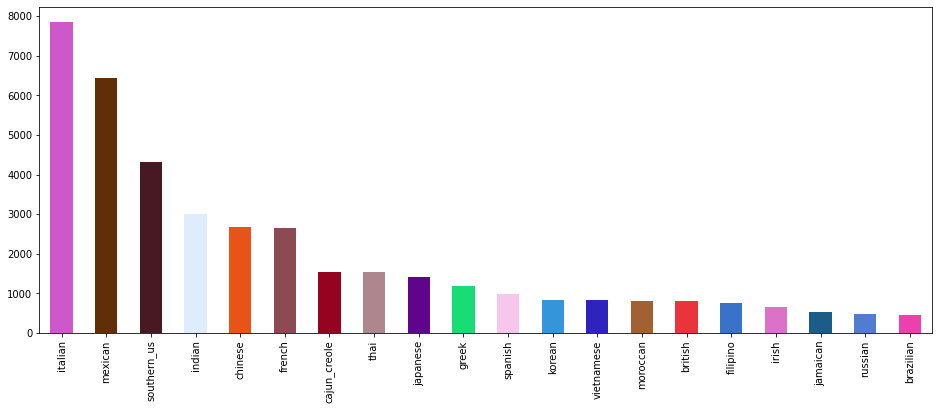

In [10]:
train_data['cuisine'].value_counts().plot.bar(color=random_col(20),figsize=(16,6))

In [11]:
##most commonly used ingredients.
from collections import Counter
most_commoning = Counter([item for lists in train_data['ingredients'] for item in lists])
print(most_commoning.most_common(20))

[('salt', 18049), ('onions', 7972), ('olive oil', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632), ('pepper', 4438), ('vegetable oil', 4385), ('eggs', 3388), ('soy sauce', 3296), ('kosher salt', 3113), ('green onions', 3078), ('tomatoes', 3058), ('large eggs', 2948), ('carrots', 2814), ('unsalted butter', 2782)]


<AxesSubplot:xlabel='tot_count', ylabel='ingredients'>

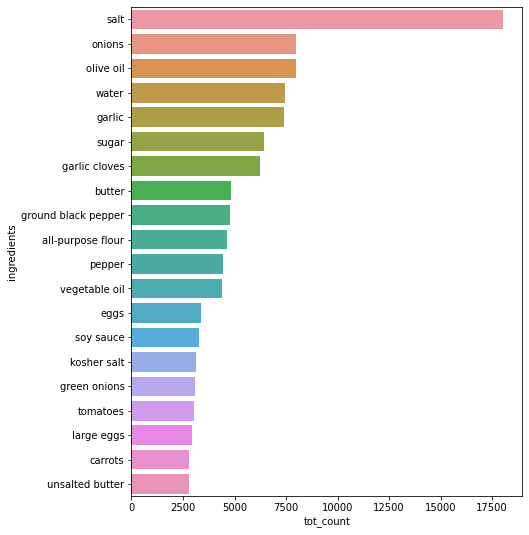

In [12]:
##plotting a graph on most common ingredients.
import matplotlib.pyplot as plt
import seaborn as sns
ing_df = pd.DataFrame(most_commoning.most_common(20))
ing_df.columns = ['ingredients','tot_count']
plt.figure(figsize=(7,9))
sns.barplot(x='tot_count',y='ingredients',data=ing_df)

In [14]:
import pandas as pd
import numpy as np
#from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
import string
punctuations = string.punctuation
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import re
#import unicodedata
lmz = WordNetLemmatizer()
 
def clean(text):
 
 
 txt = str(text).lower()
 txt = "".join(c for c in txt if c not in punctuations) 
 words = txt.split() 
 words = [i for i in words if i.isalpha()] 
 pattern = '[0-9]'
 words = [re.sub(pattern, '', i) for i in words]
 words = [re.sub(r'[^a-zA-Z]+$', '', i) for i in words] 
 
 clean_txt = " ".join(words) 
 return clean_txt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
##using stemming in preprocessing
def clean_stem(text):
 
 
 txt = str(text).lower()
 txt = "".join(c for c in txt if c not in punctuations) 
 words = txt.split() 
 words = [i for i in words if i.isalpha()] 
 pattern = '[0-9]'
 words = [re.sub(pattern, '', i) for i in words]
 words = [re.sub(r'[^a-zA-Z]+$', '', i) for i in words] 
 words = " ".join(words) 
 words=[stemer.stem(word) for word in words.split(" ") if words not in stop_words]
 
 clean_txt = " ".join(words) 
 return clean_txt



In [ ]:
#Applying the cleaning function to both test and train datasets
train_data['clean_text'] = train_data['ingredients'].apply(lambda x: clean(x))
train_data['cleanstem_text']=train_data['ingredients'].apply(lambda x:clean_stem(x))
test_data['clean_text'] = test_data['ingredients'].apply(lambda x: clean(x))

In [ ]:
train_data.head()

,id,cuisine,ingredients,clean_text,cleanstem_text
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,romain lettuc black oliv grape tomato garlic p...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,plain flour ground pepper salt tomato ground b...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,egg pepper salt mayonais cook oil green chili ...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,water veget oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,black pepper shallot cornflour cayenn pepper o...


In [ ]:
cvec = CountVectorizer()
train_cv = cvec.fit_transform(train_data['clean_text'])
test_cv = cvec.transform(test_data['clean_text'])
print(train_cv[0].todense())

[[0 0 0 ... 0 0 0]]


In [ ]:
tfidf = TfidfVectorizer(min_df = 2,max_df = 0.5,ngram_range = (1,2))
train_tfidf = tfidf.fit_transform(train_data['clean_text'])
test_tfidf = tfidf.transform(test_data['clean_text'])

In [ ]:
#label encode the target data
le = LabelEncoder()
train_data['cat_cuisine']=le.fit_transform(train_data['cuisine'])

In [ ]:
#to check the mappings of the target class to its integer value
le_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_map)


{'brazilian': 0, 'british': 1, 'cajun_creole': 2, 'chinese': 3, 'filipino': 4, 'french': 5, 'greek': 6, 'indian': 7, 'irish': 8, 'italian': 9, 'jamaican': 10, 'japanese': 11, 'korean': 12, 'mexican': 13, 'moroccan': 14, 'russian': 15, 'southern_us': 16, 'spanish': 17, 'thai': 18, 'vietnamese': 19}


In [ ]:
y_data=le.fit_transform(train_data['cuisine'])

In [ ]:

x_traintf, x_validtf, y_traintf, y_validtf = train_test_split(train_tfidf ,y_data , test_size=0.2, random_state=42)
x_traincv,x_validcv,y_traincv,y_validcv=train_test_split(train_cv ,y_data , test_size=0.2, random_state=42)

In [ ]:
train_data['cat_cuisine'].value_counts()

9     7838
13    6438
16    4320
7     3003
3     2673
5     2646
2     1546
18    1539
11    1423
6     1175
17     989
12     830
19     825
14     821
1      804
4      755
8      667
10     526
15     489
0      467
Name: cat_cuisine, dtype: int64

In [ ]:
mnb = MultinomialNB(alpha = 2.0)
metrics_cv = model_selection.cross_val_score(mnb,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score:",metrics_cv)
metric_tfidf = model_selection.cross_val_score(mnb,train_tfidf,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of tfidf:",metric_tfidf)

score: [0.71292107 0.71694319 0.72297637 0.72900955 0.71511189 0.71058587
 0.71737491 0.71486045 0.72315816 0.7178778 ]
score of tfidf: [0.57088989 0.56158874 0.57491202 0.57340372 0.56172995 0.56273573
 0.57555947 0.56701031 0.57128489 0.57530802]


In [ ]:
mnb.fit(train_cv,train_data['cat_cuisine'])

MultinomialNB(alpha=2.0)

In [ ]:
y_mnbpreds=mnb.predict(test_cv)

In [ ]:
y_mnbpreds

array([16, 16,  9, ...,  9,  2, 13])

In [ ]:
y_mnbpreds=le.inverse_transform(y_mnbpreds)

In [ ]:
y_mnbpreds

array(['southern_us', 'southern_us', 'italian', ..., 'italian',
       'cajun_creole', 'mexican'], dtype=object)

In [ ]:
test_data.head()

,id,ingredients,clean_text
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder eggs allpurpose flour raisins mi...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar egg yolks corn starch cream of tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links fennel bulb fronds olive oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts file powder smoked sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper salt sausage casings leeks...


In [ ]:
##will try to balance the dataset and apply the model on balanced dataset
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#undersampling on train countvectirizer data
undersample =RandomUnderSampler(sampling_strategy='majority')
x_undercv,y_undercv=undersample.fit_resample(train_cv,train_data['cat_cuisine'])

In [ ]:
#undersampling on train tfidf data
x_undertfidf,y_undertfidf=undersample.fit_resample(train_tfidf,train_data['cat_cuisine'])

In [ ]:
#trying multinomial Naive bayes on balanced dataset and without balanced dataset
metrics_cv = model_selection.cross_val_score(mnb,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("mean_score cv:",metrics_cv.mean())
metric_tfidf = model_selection.cross_val_score(mnb,train_tfidf,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of tfidf:",metric_tfidf.mean())
metrics_cvbal = model_selection.cross_val_score(mnb,x_undercv,y_undercv,cv = 10,scoring = 'accuracy')
print("score of cv balanced:",metrics_cvbal.mean())
metric_tfidfbal = model_selection.cross_val_score(mnb,x_undertfidf,y_undertfidf,cv = 10,scoring = 'accuracy')
print("score of tfidf balanced:",metric_tfidfbal.mean())

mean_score cv: 0.7180819248132772
score of tfidf: 0.5694422732117418
score of cv balanced: 0.7121561037021801
score of tfidf balanced: 0.539332834325635


In [ ]:
#mnb.fit(x_undercv,y_undercv)
##since we got high accuracy with CV train test data, therefore we are going with count vectorizer dataset
#y_mnbpredsbal=mnb.predict(test_cv)
#y_mnbpredsbal=le.inverse_transform(y_mnbpredsbal)
#submission = pd.DataFrame({'Id':test_data['id'],'cuisine':y_mnbpredsbal})
#submission.to_csv('submission.csv',index=False)

In [ ]:
##we are now aware that undersamping did not give much accuracy therefore, we can try without sampling the dataset
#now will go for others models, without sampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import model_selection

In [ ]:
logreg=LogisticRegression(random_state=0)
metrics_cv = model_selection.cross_val_score(logreg,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of cv:",metrics_cv.mean())
metric_tfidf = model_selection.cross_val_score(logreg,train_tfidf,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of tfidf:",metric_tfidf.mean())
metrics_cvbal = model_selection.cross_val_score(logreg,x_undercv,y_undercv,cv = 10,scoring = 'accuracy')
print("score of cv balanced:",metrics_cvbal.mean())
metric_tfidfbal = model_selection.cross_val_score(logreg,x_undertfidf,y_undertfidf,cv = 10,scoring = 'accuracy')
print("score of tfidf balanced:",metric_tfidfbal.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score of cv: 0.7852366479302242


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score of tfidf: 0.7769644915276414


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score of cv balanced: 0.7792181768315677


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score of tfidf balanced: 0.7703297450489675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#using Support vector machine
lsvc=LinearSVC()
metrics_cv = model_selection.cross_val_score(lsvc,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of cv:",metrics_cv.mean())
metric_tfidf = model_selection.cross_val_score(lsvc,train_tfidf,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of tfidf:",metric_tfidf.mean())
metrics_cvbal = model_selection.cross_val_score(lsvc,x_undercv,y_undercv,cv = 10,scoring = 'accuracy')
print("score of cv balanced:",metrics_cvbal.mean())
metric_tfidfbal = model_selection.cross_val_score(lsvc,x_undertfidf,y_undertfidf,cv = 10,scoring = 'accuracy')
print("score of tfidf balanced:",metric_tfidfbal.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

score of cv: 0.7794789686246446
score of tfidf: 0.7901138307459952


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

score of cv balanced: 0.7705769252745495
score of tfidf balanced: 0.7841865603132702


In [ ]:
#metrics_cv = model_selection.cross_val_score(lsvc,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'f1_macro')
#print("score of cv:",metrics_cv.mean())

In [ ]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
metrics_cv = model_selection.cross_val_score(knn,train_cv,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of cv:",metrics_cv.mean())
metric_tfidf = model_selection.cross_val_score(knn,train_tfidf,train_data['cat_cuisine'],cv = 10,scoring = 'accuracy')
print("score of tfidf:",metric_tfidf.mean())
metrics_cvbal = model_selection.cross_val_score(knn,x_undercv,y_undercv,cv = 10,scoring = 'accuracy')
print("score of cv balanced:",metrics_cvbal.mean())
metric_tfidfbal = model_selection.cross_val_score(knn,x_undertfidf,y_undertfidf,cv = 10,scoring = 'accuracy')
print("score of tfidf balanced:",metric_tfidfbal.mean())

score of cv: 0.6507264748674915
score of tfidf: 0.7157939132920274
score of cv balanced: 0.6403110227372286
score of tfidf balanced: 0.7141622098803525


In [ ]:
#logreg.fit(train_cv,train_data['cat_cuisine'])

In [ ]:
#y_predlogregcv=logreg.predict(test_cv)

In [ ]:
#y_predlogregcv=le.inverse_transform(y_predlogregcv)

In [ ]:
lsvc.fit(train_tfidf,train_data['cat_cuisine'])
y_predsvctf=lsvc.predict(test_tfidf)
y_predsvctf=le.inverse_transform(y_predsvctf)

In [ ]:
submission = pd.DataFrame({'Id':test_data['id'],'cuisine':y_predsvctf})
submission.to_csv('submission.csv',index=False)

In [ ]:
## now trying to evaluate the model on train and valid data which we obtained using train and test
#FOR Naive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
mnb.fit(x_traintf,y_traintf)
y_predmnbtf=mnb.predict(x_validtf)
mnb.fit(x_traincv,y_traincv)
y_predmnbcv=mnb.predict(x_validcv)

In [ ]:
predmnb_tf=classification_report(y_validtf, y_predmnbtf)
predmnb_cv=classification_report(y_validcv, y_predmnbcv)
print("report of Naivebyes with Tfidf:\n",predmnb_tf)
print("report of Naivebyes with Count Vec:\n",predmnb_cv)

report of Naivebyes with Tfidf:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00       157
           2       1.00      0.07      0.13       328
           3       0.51      0.89      0.64       510
           4       0.00      0.00      0.00       136
           5       0.74      0.07      0.13       550
           6       0.80      0.02      0.03       249
           7       0.81      0.80      0.80       602
           8       0.00      0.00      0.00       151
           9       0.47      0.96      0.63      1567
          10       0.00      0.00      0.00        91
          11       1.00      0.25      0.40       284
          12       1.00      0.03      0.06       166
          13       0.67      0.92      0.77      1336
          14       0.00      0.00      0.00       166
          15       0.00      0.00      0.00        89
          16       0.49      0.63      0.55     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#FOR Logistic reg
logreg.fit(x_traintf,y_traintf)
y_predlogregtf=logreg.predict(x_validtf)
logreg.fit(x_traincv,y_traincv)
y_predlogregcv=logreg.predict(x_validcv)
predlogreg_tf=classification_report(y_validtf, y_predlogregtf)
predlogreg_cv=classification_report(y_validcv, y_predlogregcv)
print("report of Logistic Reg with Tfidf:\n",predlogreg_tf)
print("report of Logistic Reg with Count Vec:\n",predlogreg_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


report of Logistic Reg with Tfidf:
               precision    recall  f1-score   support

           0       0.80      0.46      0.59        84
           1       0.68      0.31      0.42       157
           2       0.83      0.67      0.74       328
           3       0.74      0.88      0.81       510
           4       0.77      0.41      0.54       136
           5       0.61      0.65      0.63       550
           6       0.81      0.59      0.69       249
           7       0.86      0.90      0.88       602
           8       0.68      0.36      0.47       151
           9       0.77      0.92      0.84      1567
          10       0.94      0.51      0.66        91
          11       0.87      0.68      0.76       284
          12       0.85      0.68      0.76       166
          13       0.89      0.93      0.91      1336
          14       0.89      0.69      0.78       166
          15       0.75      0.34      0.47        89
          16       0.64      0.80      0.71  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#FOR Linear SVC
lsvc.fit(x_traintf,y_traintf)
y_predlsvctf=lsvc.predict(x_validtf)
lsvc.fit(x_traincv,y_traincv)
y_predlsvccv=lsvc.predict(x_validcv)
predlsvc_tf=classification_report(y_validtf, y_predlsvctf)
predlsvc_cv=classification_report(y_validcv, y_predlsvccv)
print("report of Linear SVC with Tfidf:\n",predlsvc_tf)
print("report of  Linear SVC with Count Vec:\n",predlsvc_cv)

report of Linear SVC with Tfidf:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69        84
           1       0.58      0.41      0.48       157
           2       0.79      0.67      0.73       328
           3       0.77      0.84      0.80       510
           4       0.71      0.55      0.62       136
           5       0.62      0.65      0.63       550
           6       0.73      0.68      0.70       249
           7       0.86      0.88      0.87       602
           8       0.67      0.49      0.57       151
           9       0.81      0.89      0.85      1567
          10       0.86      0.70      0.78        91
          11       0.80      0.74      0.77       284
          12       0.84      0.74      0.79       166
          13       0.90      0.94      0.92      1336
          14       0.85      0.75      0.79       166
          15       0.60      0.48      0.53        89
          16       0.71      0.78      0.75    

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#FOR Linear knn
knn.fit(x_traintf,y_traintf)
y_predknntf=knn.predict(x_validtf)
knn.fit(x_traincv,y_traincv)
y_predknncv=knn.predict(x_validcv)
predknn_tf=classification_report(y_validtf, y_predknntf)
predknn_cv=classification_report(y_validcv, y_predknncv)
print("report of knn with Tfidf:\n",predknn_tf)
print("report of  knn with Count Vec:\n",predknn_cv)

report of knn with Tfidf:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59        84
           1       0.54      0.39      0.46       157
           2       0.71      0.64      0.67       328
           3       0.67      0.86      0.75       510
           4       0.62      0.45      0.52       136
           5       0.54      0.60      0.57       550
           6       0.69      0.54      0.61       249
           7       0.79      0.81      0.80       602
           8       0.61      0.41      0.49       151
           9       0.68      0.87      0.77      1567
          10       0.81      0.47      0.60        91
          11       0.78      0.58      0.67       284
          12       0.78      0.70      0.74       166
          13       0.84      0.86      0.85      1336
          14       0.72      0.51      0.59       166
          15       0.60      0.20      0.30        89
          16       0.67      0.65      0.66       848
